In [1]:
from PIL import Image
import torch
import numpy as np
im = Image.open('/home/asap7772/asap7772/real_data_kitchen/bridge_data/toykitchen1/flip_pot_upright_in_sink_distractors/2021-06-02_16-53-06/raw/traj_group0/traj0/images0/im_0.jpg')


In [2]:
im.save('/home/asap7772/asap7772/real_data_kitchen/original.png')

width, height = im.size   # Get dimensions
new_width, new_height = 480,480

left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))
im = im.resize((64,64), Image.ANTIALIAS)

im.save('/home/asap7772/asap7772/real_data_kitchen/cropped.png')

In [3]:
from torchvision import transforms
import matplotlib.pyplot as plt
trans = transforms.ToTensor()
tens = trans(im).numpy().flatten()
print(tens)

[0.3764706  0.37254903 0.36078432 ... 0.48235294 0.59607846 0.75686276]


In [4]:
%matplotlib inline
def plot_img(obs_img):
    if type(obs_img) == torch.Tensor:
        from torchvision import transforms
        im_new = transforms.ToPILImage()(obs_img.cpu())
    else:
        im_new = obs_img
    plt.imshow(im_new)

In [6]:
tens

array([0.3764706 , 0.37254903, 0.36078432, ..., 0.48235294, 0.59607846,
       0.75686276], dtype=float32)

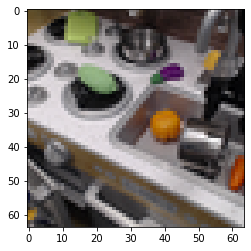

In [5]:
plot_img(torch.from_numpy(tens.reshape(3,64,64)))